In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
df = pd.read_csv('MNIST_Digit/train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check datatypes, all numeric data
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

int64    785
Name: count, dtype: int64


In [ ]:
len(df.columns)

785

In [ ]:
#Null Value Columns
nullseries= df.isna().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


In [ ]:
# Describe the data
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


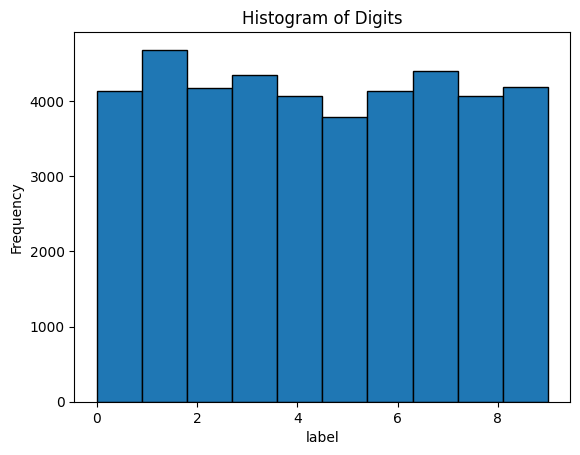

In [ ]:
#Create Histogram
import matplotlib.pyplot as plt

# labels are evenly distributed
plt.hist(df['label'], bins=10, edgecolor='black')  # Assuming binary data, adjust 'bins' as needed
plt.xlabel('label')
plt.ylabel('Frequency')
plt.title('Histogram of Digits')
plt.show()

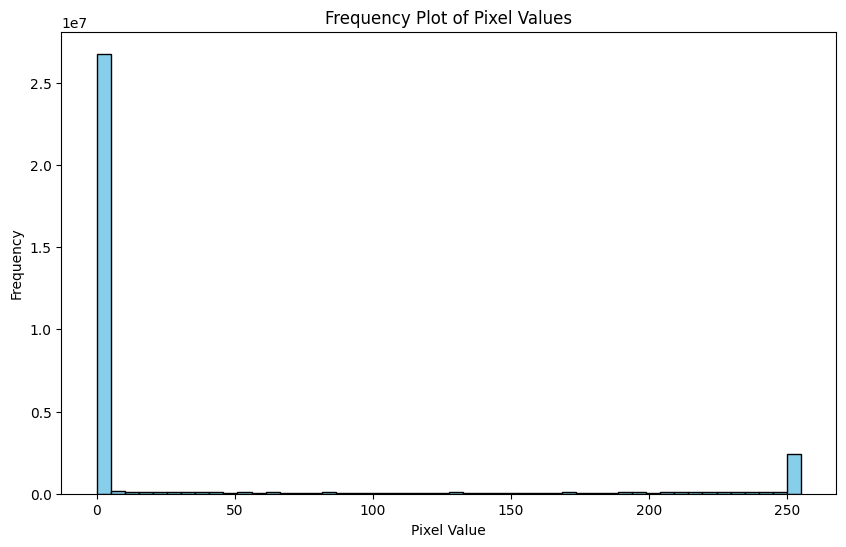

In [ ]:
#create a heat map of all labels
columns_to_plot = df.columns  # Add all relevant column names

# Flatten the selected columns into a single array
values = df[columns_to_plot].values.flatten()

# Plot the frequency of values
plt.figure(figsize=(10, 6))
plt.hist(values, bins=50, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Frequency Plot of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

#Majority of the pixels in the dataset are white while some are black, not many other pixel values.

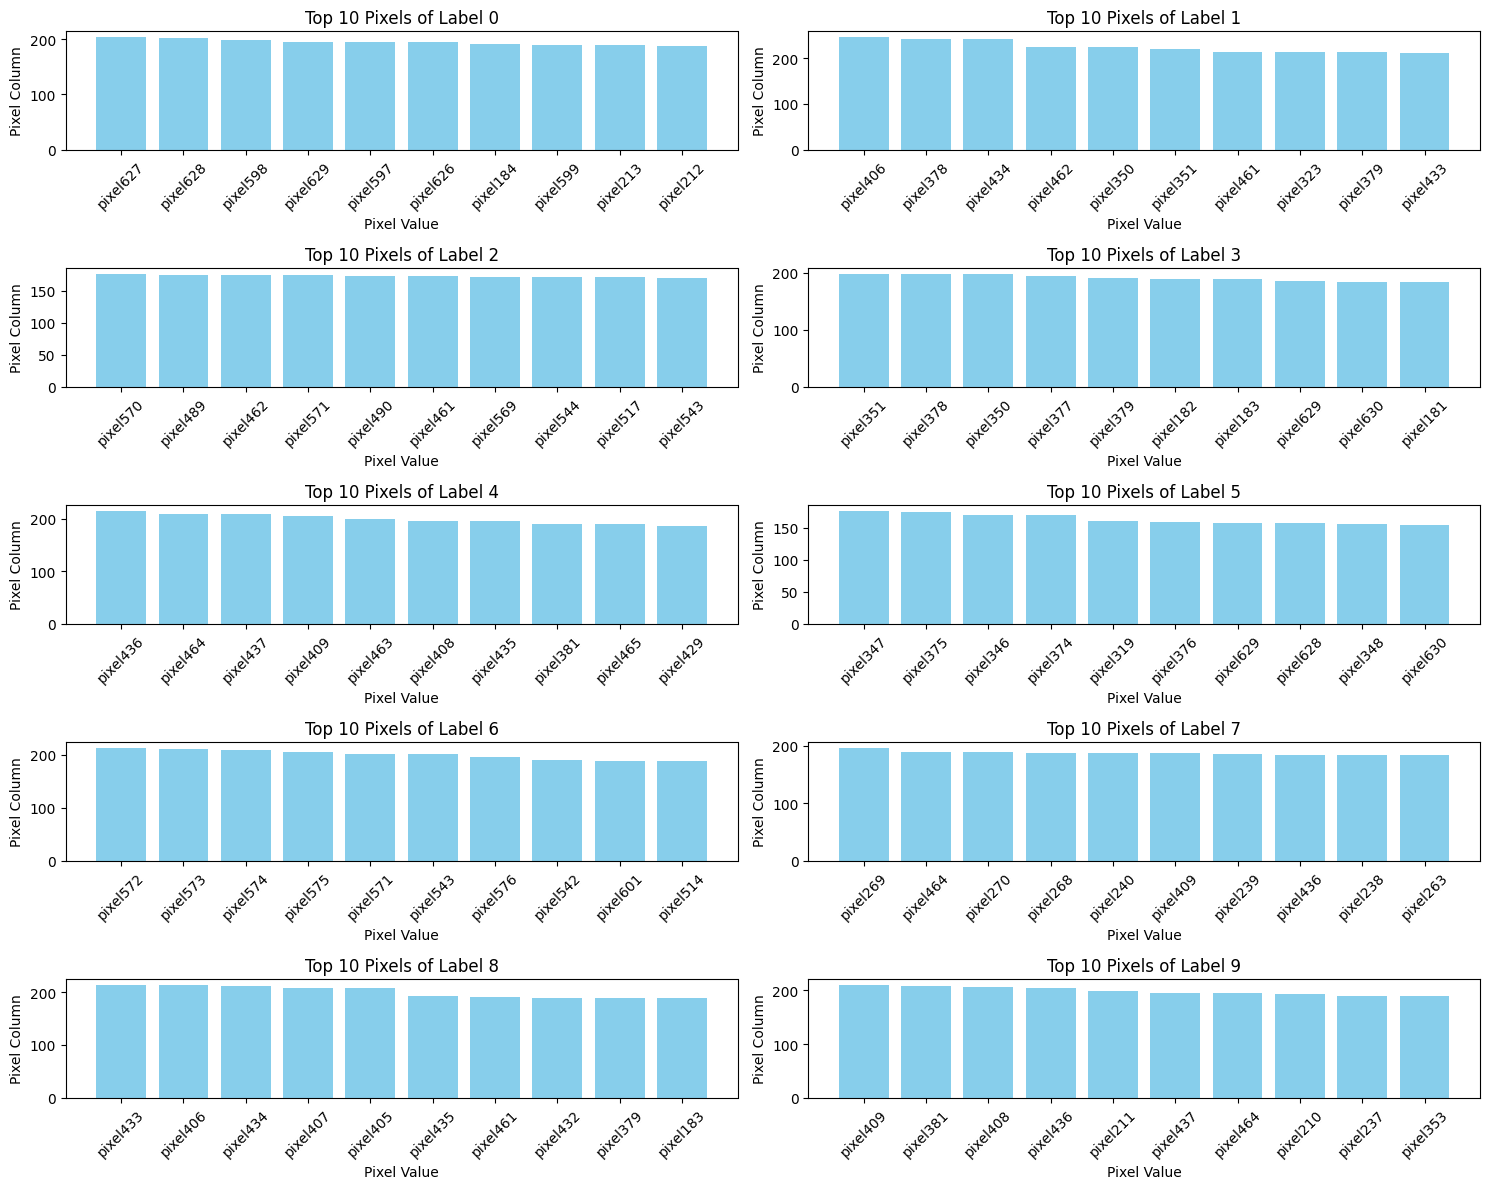

In [ ]:
average_pixel_values_grouped = df.groupby('label').mean()
# Create a subplot with 10 plots (2 each row)
fig, axs = plt.subplots(5, 2, figsize=(15, 12))

for index, row in average_pixel_values_grouped.iterrows():
    largest_10 = row.nlargest(10)
    largest_10 = largest_10.sort_values(ascending=False)
    ax = axs[index // 2, index % 2]  # Calculate row and column index for subplot
    ax.bar(largest_10.index, largest_10.values, color='skyblue')
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Pixel Column')
    ax.set_title('Top 10 Pixels of Label {}'.format(index))
    ax.tick_params(axis='x', labelrotation = 45)  # Rotate label


plt.tight_layout()
plt.show()

#Top 10 pixels are different across every labels

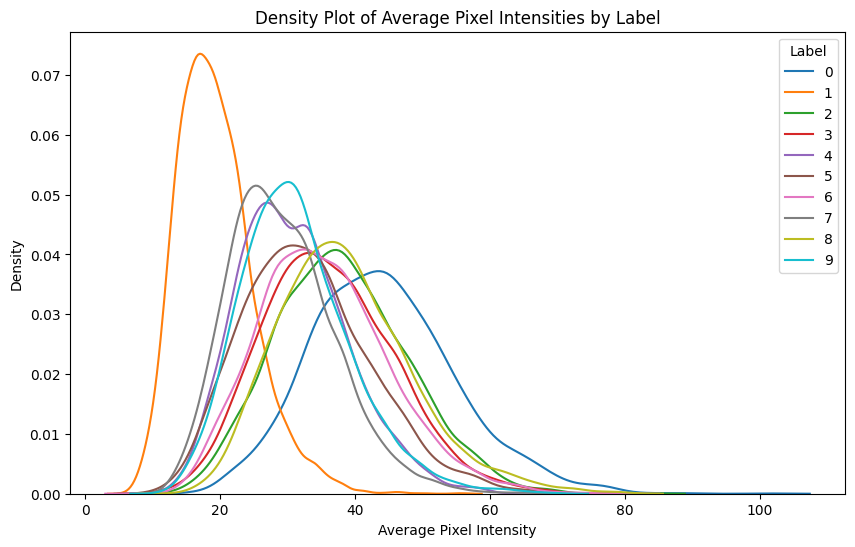

In [ ]:
plt.figure(figsize=(10, 6))
for label in sorted(df['label'].unique()):
    sns.kdeplot(df[df['label'] == label].mean(axis=1), label=label, fill=False)
plt.title('Density Plot of Average Pixel Intensities by Label')
plt.xlabel('Average Pixel Intensity')
plt.ylabel('Density')
plt.legend(title='Label')
plt.grid(False)
plt.show()

#Most of label 1 has lower intensity than other labels; label 0 has the highest pixel intensity

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_df = df.copy()
black_pixels = []
white_pixels = []
print(len(df.columns))
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_df = clean_df.drop(black_pixels, axis=1)
clean_df = clean_df.drop(white_pixels, axis=1)
print(len(black_pixels))
print(len(white_pixels))
print(len(clean_df.columns))

785
76
0
709


# Split Training and Testing

In [ ]:
x = clean_df.drop(columns=['label'])
y = clean_df['label']

# Use K-Fold Later
from sklearn.model_selection import train_test_split
# Split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Neural Network Without Standard Scaling**

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

# Define experimental design
layers = [2, 5]
nodes = [10, 20]

# Prepare data (Assuming x_train and y_train are already loaded)

# Initialize lists to store results
time_taken = []
training_accuracy = []
testing_accuracy = []

# Iterate over each combination of layers and nodes
for layer in layers:
    for node in nodes:
        # Create neural network with current layer and node configuration
        neural_net = MLPClassifier(hidden_layer_sizes=(node,) * layer, max_iter=1000)

        # Start training timer
        start_time = time.time()

        # Train neural network
        neural_net.fit(x_train, y_train)

        # Record time taken for training
        time_taken.append(time.time() - start_time)

        # Record training accuracy
        training_accuracy.append(neural_net.score(x_train, y_train))

        # Record testing accuracy
        testing_accuracy.append(neural_net.score(x_test, y_test))

# Print results
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")


Layers: 2, Nodes: 10, Time: 313.3716700077057, Training Accuracy: 0.9114583333333334, Testing Accuracy: 0.8783333333333333
Layers: 2, Nodes: 20, Time: 126.3457510471344, Training Accuracy: 0.9778571428571429, Testing Accuracy: 0.9339285714285714
Layers: 5, Nodes: 10, Time: 285.35211634635925, Training Accuracy: 0.9396130952380952, Testing Accuracy: 0.8958333333333334
Layers: 5, Nodes: 20, Time: 176.1007297039032, Training Accuracy: 0.9904761904761905, Testing Accuracy: 0.9355952380952381


In [ ]:
for layer in layers:
    for node in nodes:
      print((node,)* layer)

(10, 10)
(20, 20)
(10, 10, 10, 10, 10)
(20, 20, 20, 20, 20)


In [ ]:
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")

Layers: 2, Nodes: 10, Time: 313.3716700077057, Training Accuracy: 0.9114583333333334, Testing Accuracy: 0.8783333333333333
Layers: 2, Nodes: 20, Time: 126.3457510471344, Training Accuracy: 0.9778571428571429, Testing Accuracy: 0.9339285714285714
Layers: 5, Nodes: 10, Time: 285.35211634635925, Training Accuracy: 0.9396130952380952, Testing Accuracy: 0.8958333333333334
Layers: 5, Nodes: 20, Time: 176.1007297039032, Training Accuracy: 0.9904761904761905, Testing Accuracy: 0.9355952380952381


In [ ]:
start_time = time.time()
neural_net = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=1000)
neural_net.fit(x_train, y_train)
print(f'It takes {time.time() - start_time} seconds to train 20 nodes 5 layers NetWork')

It takes 109.3866958618164 seconds to train 20 nodes 5 layers NetWork


Text(0.5, 427.9555555555555, 'Predicted label')

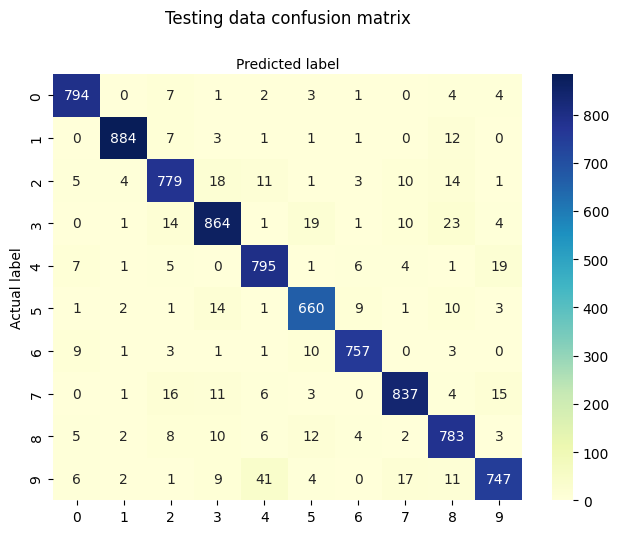

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Testing Data confusion matrix
neural_pred = neural_net.predict(x_test)
test_conf_matrix = confusion_matrix(y_test, neural_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Testing data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Prediction on Test Dataset**

In [ ]:
# Make prediction on test dataset
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
predictions = neural_net.predict(clean_test_df)

In [ ]:
imageId = pd.Series(range(1, len(predictions)+1)).astype(int)
result = {'ImageId': imageId, 'Label': predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('MNIST_Digit/Neural_Network_Unscaled_prediction.csv',index=False)

## **Neural Network Standard Scale**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

# Define experimental design
layers = [2, 5]
nodes = [10, 20]

# Prepare data (Assuming x_train and y_train are already loaded)

# Initialize lists to store results
time_taken = []
training_accuracy = []
testing_accuracy = []

# Iterate over each combination of layers and nodes
for layer in layers:
    for node in nodes:
        # Create neural network with current layer and node configuration
        neural_net = MLPClassifier(hidden_layer_sizes=(node,) * layer, max_iter=1000)

        # Start training timer
        start_time = time.time()

        # Train neural network
        neural_net.fit(x_train_scaled, y_train)

        # Record time taken for training
        time_taken.append(time.time() - start_time)

        # Record training accuracy
        training_accuracy.append(neural_net.score(x_train_scaled, y_train))

        # Record testing accuracy
        testing_accuracy.append(neural_net.score(x_test_scaled, y_test))

# Print results
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")


Layers: 2, Nodes: 10, Time: 218.75375127792358, Training Accuracy: 0.9859821428571428, Testing Accuracy: 0.9082142857142858
Layers: 2, Nodes: 20, Time: 107.57854437828064, Training Accuracy: 0.9985416666666667, Testing Accuracy: 0.9458333333333333
Layers: 5, Nodes: 10, Time: 283.8109927177429, Training Accuracy: 0.9836309523809523, Testing Accuracy: 0.9082142857142858
Layers: 5, Nodes: 20, Time: 141.67477869987488, Training Accuracy: 0.9997619047619047, Testing Accuracy: 0.9432142857142857


In [ ]:
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")

Layers: 2, Nodes: 10, Time: 218.75375127792358, Training Accuracy: 0.9859821428571428, Testing Accuracy: 0.9082142857142858
Layers: 2, Nodes: 20, Time: 107.57854437828064, Training Accuracy: 0.9985416666666667, Testing Accuracy: 0.9458333333333333
Layers: 5, Nodes: 10, Time: 283.8109927177429, Training Accuracy: 0.9836309523809523, Testing Accuracy: 0.9082142857142858
Layers: 5, Nodes: 20, Time: 141.67477869987488, Training Accuracy: 0.9997619047619047, Testing Accuracy: 0.9432142857142857


In [ ]:
start_time = time.time()
neural_net = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1000)
neural_net.fit(x_train_scaled, y_train)
print(f'It takes {time.time() - start_time} seconds to train 20 nodes 2 layers NetWork')

It takes 103.00234508514404 seconds to train 20 nodes 2 layers NetWork


Text(0.5, 427.9555555555555, 'Predicted label')

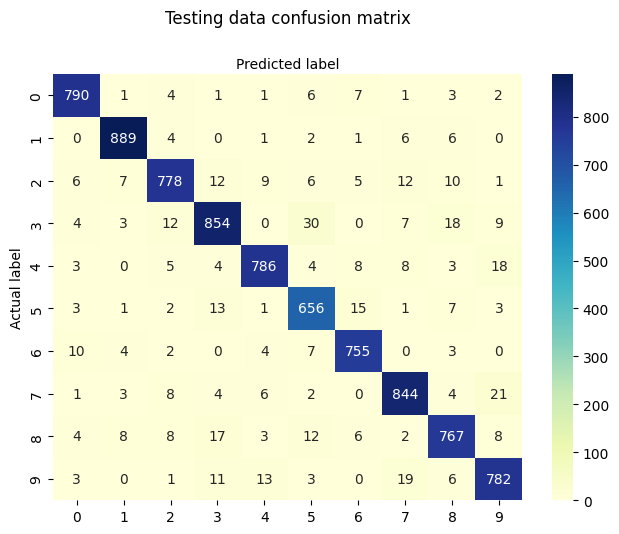

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Testing Data confusion matrix
neural_pred = neural_net.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, neural_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Testing data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Prediction on Test Dataset**

In [ ]:
# Make prediction on test dataset
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
# Standard Scale
scaler = StandardScaler()
predict_scaled = scaler.fit_transform(clean_test_df)

In [ ]:
predictions = neural_net.predict(predict_scaled)

In [ ]:
imageId = pd.Series(range(1, len(predictions)+1)).astype(int)
result = {'ImageId': imageId, 'Label': predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('MNIST_Digit/Neural_Network_scaled_prediction.csv',index=False)

# Neural Net Experiment 2

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standard Scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
import time
from sklearn.neural_network import MLPClassifier

# Define experimental design
layers = [3, 5]
nodes = [20, 30]

# Prepare data (Assuming x_train and y_train are already loaded)

# Initialize lists to store results
time_taken = []
training_accuracy = []
testing_accuracy = []

# Iterate over each combination of layers and nodes
for layer in layers:
    for node in nodes:
        # Create neural network with current layer and node configuration
        neural_net = MLPClassifier(hidden_layer_sizes=(node,) * layer, max_iter=1000)

        # Start training timer
        start_time = time.time()

        # Train neural network
        neural_net.fit(x_train_scaled, y_train)

        # Record time taken for training
        time_taken.append(time.time() - start_time)

        # Record training accuracy
        training_accuracy.append(neural_net.score(x_train_scaled, y_train))

        # Record testing accuracy
        testing_accuracy.append(neural_net.score(x_test_scaled, y_test))

# Print results
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")


Layers: 3, Nodes: 20, Time: 89.13008999824524, Training Accuracy: 0.9999107142857143, Testing Accuracy: 0.9435714285714286
Layers: 3, Nodes: 30, Time: 55.43762469291687, Training Accuracy: 0.9999404761904762, Testing Accuracy: 0.9566666666666667
Layers: 5, Nodes: 20, Time: 108.07192993164062, Training Accuracy: 0.9999107142857143, Testing Accuracy: 0.9433333333333334
Layers: 5, Nodes: 30, Time: 68.57372498512268, Training Accuracy: 1.0, Testing Accuracy: 0.9541666666666667


In [ ]:
for i in range(len(layers)):
    for j in range(len(nodes)):
        print(f"Layers: {layers[i]}, Nodes: {nodes[j]}, Time: {time_taken[i*len(nodes)+j]}, Training Accuracy: {training_accuracy[i*len(nodes)+j]}, Testing Accuracy: {testing_accuracy[i*len(nodes)+j]}")

Layers: 3, Nodes: 20, Time: 89.13008999824524, Training Accuracy: 0.9999107142857143, Testing Accuracy: 0.9435714285714286
Layers: 3, Nodes: 30, Time: 55.43762469291687, Training Accuracy: 0.9999404761904762, Testing Accuracy: 0.9566666666666667
Layers: 5, Nodes: 20, Time: 108.07192993164062, Training Accuracy: 0.9999107142857143, Testing Accuracy: 0.9433333333333334
Layers: 5, Nodes: 30, Time: 68.57372498512268, Training Accuracy: 1.0, Testing Accuracy: 0.9541666666666667


In [ ]:
start_time = time.time()
neural_net = MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)
neural_net.fit(x_train_scaled, y_train)
print(f'It takes {time.time() - start_time} seconds to train 30 nodes 3 layers NetWork')

It takes 59.0290744304657 seconds to train 30 nodes 3 layers NetWork


Text(0.5, 427.9555555555555, 'Predicted label')

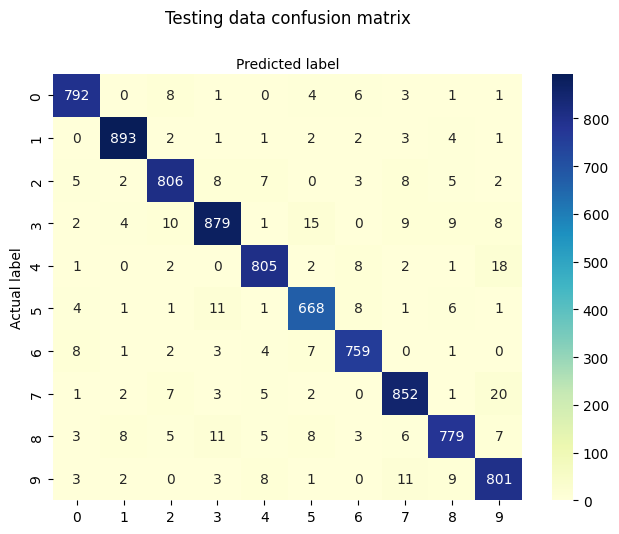

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Testing Data confusion matrix
neural_pred = neural_net.predict(x_test_scaled)
test_conf_matrix = confusion_matrix(y_test, neural_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(test_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Testing data confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Prediction on Test Dataset**

In [ ]:
# Make prediction on test dataset
test_df = pd.read_csv('MNIST_Digit/test.csv')

In [ ]:
# Remove any columns with constant values. They won't contribute to the classifiers
clean_test_df = test_df.copy()
black_pixels = []
white_pixels = []
for pixel in df.columns:
  if max(df[pixel]) == 0:
    black_pixels.append(pixel)
  if min(df[pixel]) == 255:
    white_pixels.append(pixel)

clean_test_df = clean_test_df.drop(black_pixels, axis=1)
clean_test_df = clean_test_df.drop(white_pixels, axis=1)
print(len(clean_df.columns))
print(len(clean_test_df.columns)) # should be 1 less than clean_df because there is no label column

709
708


In [ ]:
# Standard Scale
scaler = StandardScaler()
predict_scaled = scaler.fit_transform(clean_test_df)

In [ ]:
predictions = neural_net.predict(predict_scaled)

In [ ]:
imageId = pd.Series(range(1, len(predictions)+1)).astype(int)
result = {'ImageId': imageId, 'Label': predictions}
result_df = pd.DataFrame(result)
result_df.to_csv('MNIST_Digit/Neural_Network_scaled_2_prediction.csv',index=False)